In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/aiml_pro/imdb_crop.tar .
!cp /content/drive/MyDrive/aiml_pro/wiki_crop.tar .

In [ ]:
!tar -xf wiki_crop.tar
!tar -xf imdb_crop.tar

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [ ]:
def imShowCV(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [ ]:
import os

ages = os.scandir('wiki_crop')
length = 0
for age in ages:

   if '.mat' not in str(age.path):


     length+=len(os.listdir(age.path))

print(length)

62328


In [ ]:
import os

ages = os.scandir('imdb_crop')
length = 0
for age in ages:

   if '.mat' not in str(age.path):


     length+=len(os.listdir(age.path))

print(length)

460723


In [ ]:
import scipy.io
imdbMat = scipy.io.loadmat('imdb_crop/imdb.mat')
imdbPlace = imdbMat['imdb'][0][0]
print(imdbPlace)
print(len(imdbPlace))
for item in imdbPlace:
  print(item)
  print(len(item[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'imdb_crop/imdb.mat'

In [ ]:
wikiMat = scipy.io.loadmat('wiki_crop/wiki.mat')
wikiPlace = wikiMat['wiki'][0][0]
print(wikiPlace)
print(len(wikiPlace))
for item in wikiPlace:
  print(item)
  print(len(item[0]))

(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U14'),
        array(['Greta Van Susteren'], dtype='<U18')]], dtype=object), array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),
  

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
----------------------
150002
1953
2004
AGE 51
NAME ['Frances Fisher']
GENDER 0
[[ 69.918  69.918 225.472 225.472]]
5.175258025281735
nan
60858


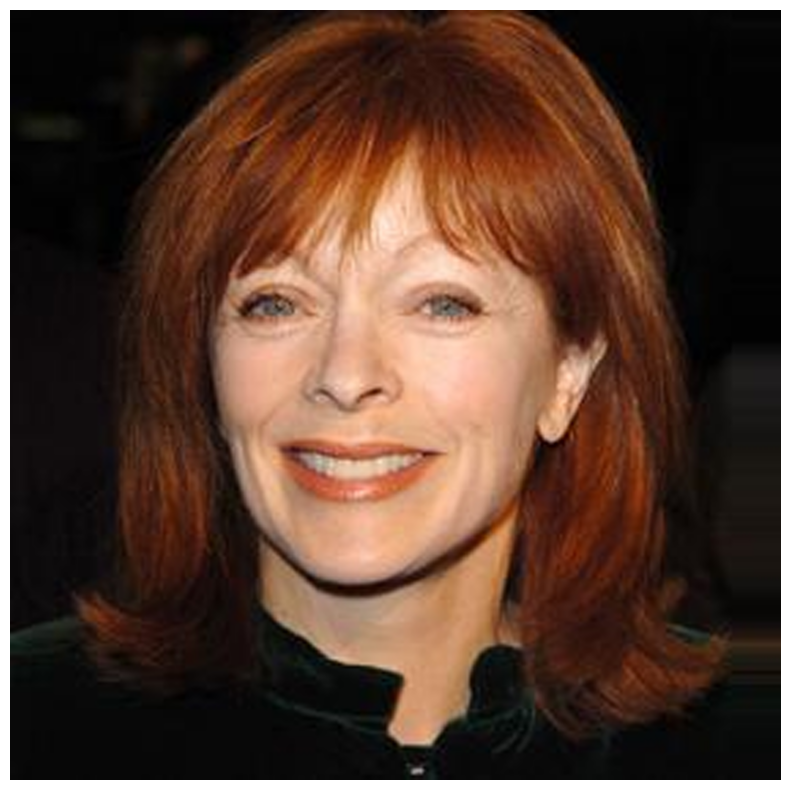

In [ ]:
place = imdbPlace
where='imdb_crop'
total = 0
for i in range(460723):
  if i % 10000 ==0:
    print(i)
  bYear = int(place[0][0][i]/365) #birth year
  taken = place[1][0][i] #photo taken
  path = place[2][0][i][0]
  gender = place[3][0][i] # Female/Male
  name = place[4][0][i] # Name
  faceBox= place[5][0][i] # Face coords
  faceScore = place[6][0][i] #Face score
  secFaceScore = place[7][0][i] #Sec face score

  age = taken - bYear
  faceScore = str(faceScore)
  secFaceScore = str(secFaceScore)
  if 'n' not in faceScore: # n as in Inf; if true, implies that there isn't a face in the image

    if 'a' in secFaceScore: #a as in NaN; implies that no second face was found

      if age >= 0:
        try:
          gender = int(gender)
          total +=1
          if i > 150000:
            print('----------------------')
            print(i)
            print(bYear)
            print(taken)
            print("AGE", age)
            print("NAME", name)
            print("GENDER", gender)
            print(faceBox)
            print(faceScore)
            print(secFaceScore)

            imShow(os.path.join(where,path))
            break
        except:
          # print('Failed with gender')
          continue
  print(total)

0
----------------------
1962
2013
AGE 51
NAME ['Abdellatif Kechiche']
GENDER 1
3609


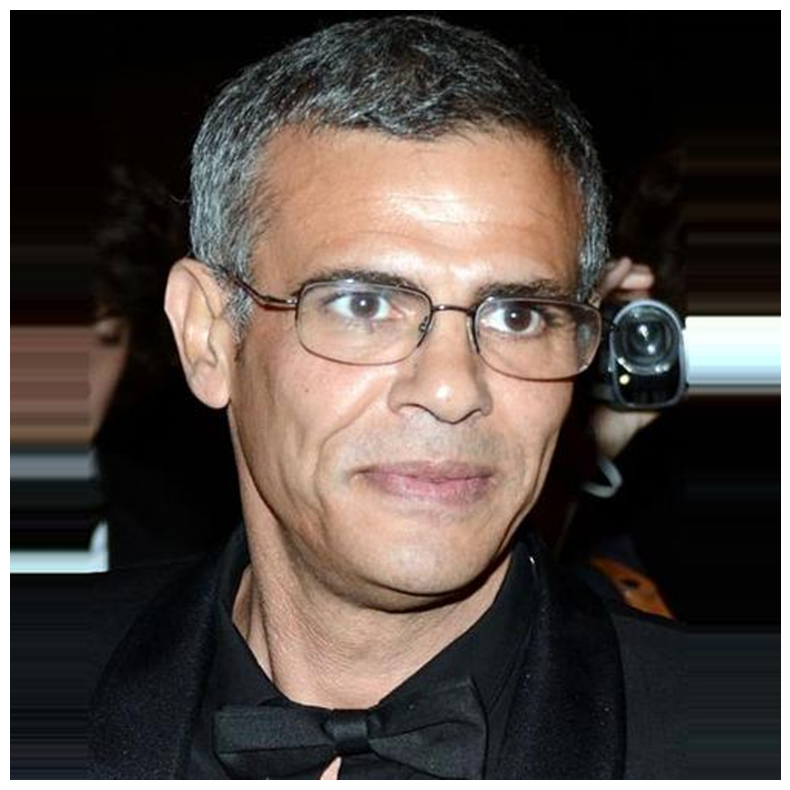

In [ ]:
from shutil import copy2
import cv2


place = wikiPlace
where='wiki_crop'
total = 0




listyList = []

for i in range(62328):
  if i % 10000 ==0:
    print(i)

  bYear = int(place[0][0][i]/365) #birth year
  taken = place[1][0][i] #photo taken
  path = place[2][0][i][0]
  gender = place[3][0][i] # Female/Male
  name = place[4][0][i] # Name
  faceBox= place[5][0][i] # Face coords
  faceScore = place[6][0][i] #Face score
  secFaceScore = place[7][0][i] #Sec face score

  age = taken - bYear


  faceScore = str(faceScore)
  secFaceScore = str(secFaceScore)




  if 'n' not in faceScore: # n as in Inf; if true, implies that there isn't a face in the image

    if 'a' in secFaceScore: #a as in NaN; implies that no second face was found

      if age >= 0:

        try:
          gender = int(gender)
          total += 1

          if i > 5678:

            print('----------------------')

            print(bYear)
            print(taken)
            print("AGE", age)
            print("NAME", name)
            print("GENDER", gender)
            # print(faceBox)
            #print(faceScore)
            #print(secFaceScore)

            imShow(os.path.join(where,path))
            break

        except:
          # print('Failed with gender')
          continue






print(total)


In [ ]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "/content/drive/MyDrive/aiml_pro/opencv_face_detector.pbtxt"
faceModel = "/content/drive/MyDrive/aiml_pro/opencv_face_detector_uint8.pb"

ageProto = "/content/drive/MyDrive/aiml_pro/age_deploy.prototxt"
ageModel = "/content/drive/MyDrive/aiml_pro/age_net.caffemodel"

genderProto = "/content/drive/MyDrive/aiml_pro/gender_deploy.prototxt"
genderModel = "/content/drive/MyDrive/aiml_pro/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

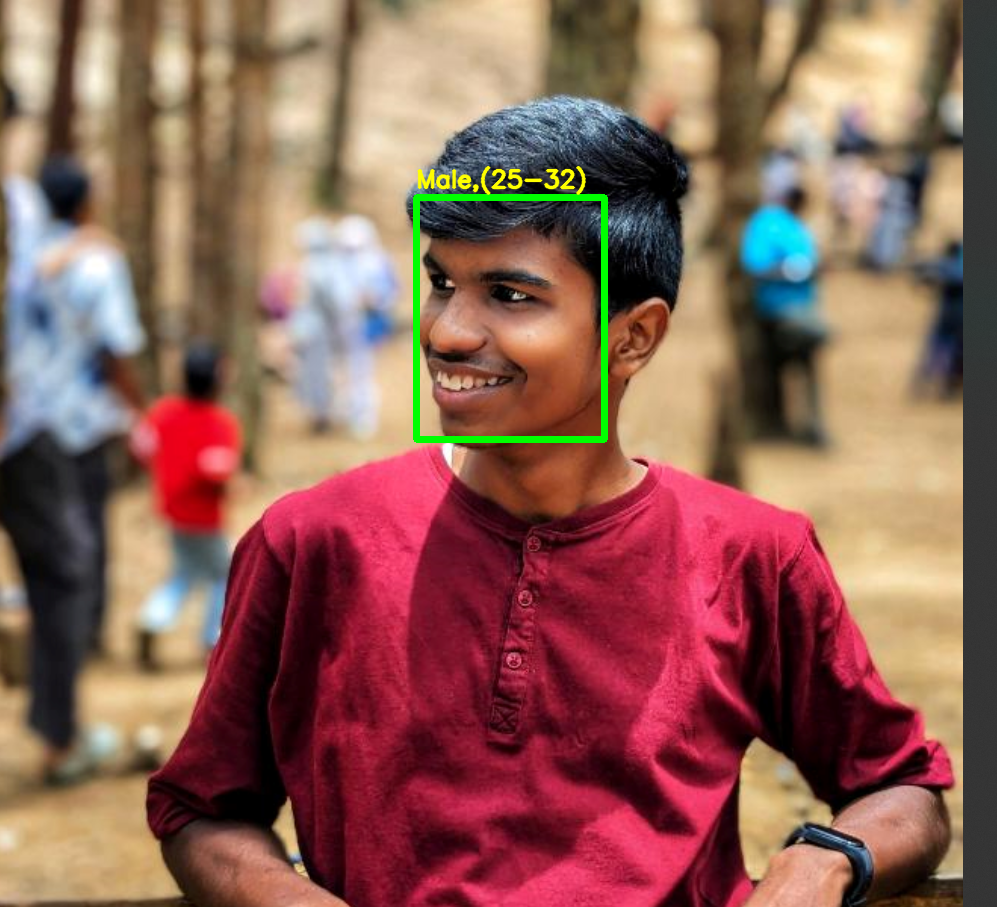

In [ ]:
input = cv.imread("/content/Screenshot 2024-08-01 111312.png")
output = age_gender_detector(input)
cv2_imshow(output)

In [ ]:
import cv2
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = age_gender_detector(frame)
  out.write(output)
out.release()
print("Done processing video")

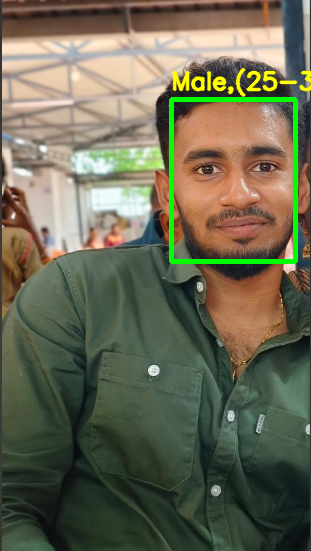

In [ ]:
input = cv.imread("/content/Screenshot 2024-11-23 112643.png")
output = age_gender_detector(input)
cv2_imshow(output)

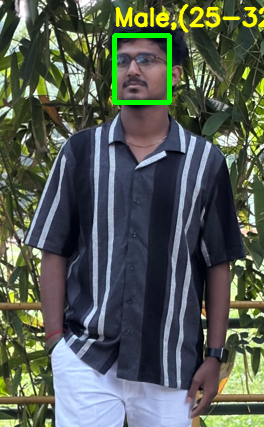

In [ ]:
input = cv.imread("/content/Screenshot 2024-11-23 120016.png")
output = age_gender_detector(input)
cv2_imshow(output)

In [ ]:
input = cv.imread("")
output = age_gender_detector(input)
cv2_imshow(output)

AttributeError: 'NoneType' object has no attribute 'copy'